# Exploratory Data Analysis - Titanic

### Note : You can get the data from this kaggle [link]('https://www.kaggle.com/c/titanic/download/train.csv') 

## Following topics will be covered in this data analysis - ![topics](exploratory-data-analysis-checklist.png)

## 1. Reading the data

In [8]:
import pandas as pd
import numpy as np

In [2]:
titanic_data = pd.read_csv('data/train.csv')

### Print the first 5 rows to get an overview of the dataset.

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Variable Identification

### Print the data type information regarding all the columns.

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Describe the statistics regarding continous variables.

In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Describe the statistics regarding categorical variables.

In [7]:
titanic_data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leinonen, Mr. Antti Gustaf",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


### Does the dataframe contains any null value? If yes, count of null values.

In [7]:
print(titanic_data.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


### Print the count of null values in the dataframe.

In [9]:
print("Null values in Age column are ", titanic_data.Age.isna().sum())
print("Null values in Cabin column are ", titanic_data.Cabin.isna().sum())
print("Null values in Embarked column are ", titanic_data.Embarked.isna().sum())

Null values in Age column are  177
Null values in Cabin column are  687
Null values in Embarked column are  2


## 3. Univariate Analysis

### Continuous Variable

### Categorical Variable

### a. Continuous Variable - Analyzing Age column.

### Print the Mean, Median, Standard Deviation and Describe the age column data.

In [10]:
print("Mean of the age column is - ", titanic_data.Age.mean())
print("Median of the age column is - ", titanic_data.Age.median())
print("Standard Deviation of the age column is - ", titanic_data.Age.std())
print("Description regarding age column.")
titanic_data.Age.describe()

Mean of the age column is -  29.69911764705882
Median of the age column is -  28.0
Standard Deviation of the age column is -  14.526497332334042
Description regarding age column.


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Display the distribution of the data visually

In [11]:
import matplotlib.pyplot as plt

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


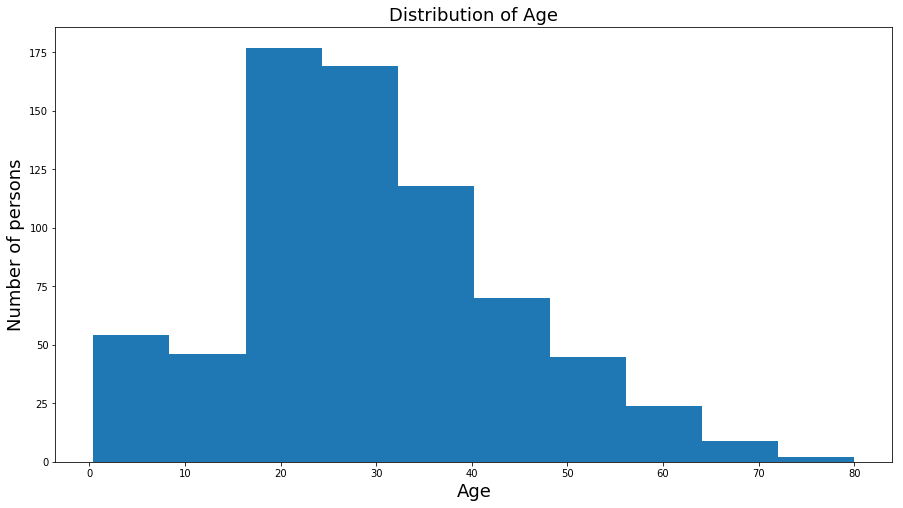

In [12]:
plt.figure(figsize=(15, 8))
plt.hist(titanic_data.Age)
font = {'size' : 18 }
plt.xlabel('Age', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
plt.title("Distribution of Age", fontdict=font)
plt.savefig('visualizations/Age-Distribution.png')
plt.show()

### Create bins for age column.

In [13]:
age_data = pd.cut(titanic_data.Age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

In [14]:
print(age_data.value_counts().sort_index(ascending=True))

(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Age, dtype: int64


### Determine the outliers using the box plot

In [15]:
import seaborn as sns

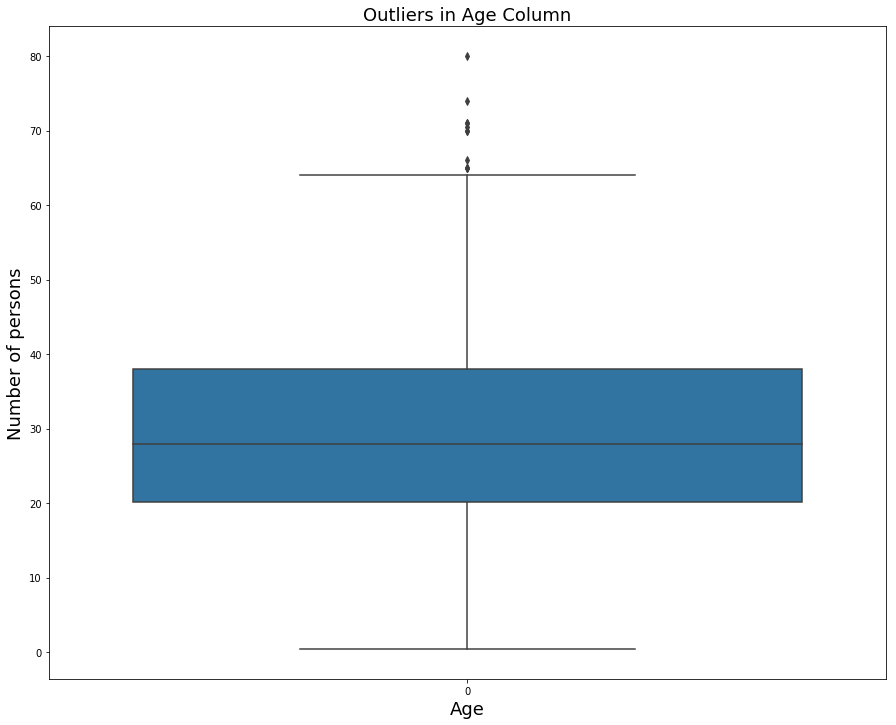

In [17]:
fig, ax = plt.subplots(figsize=(15, 12))
font = {'size' : 18 }
plt.xlabel('Age', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
sns.boxplot(data=titanic_data.Age, ax=ax)
plt.title('Outliers in Age Column', fontdict=font)
plt.savefig('visualizations/Age-Outliers.png')
plt.show()

### b. Categorical Variable - Analyzing sex column.

### Count the number of values that we have for sex column.

In [18]:
titanic_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Print the percentage of each value.

In [19]:
total_passenger_on_board = titanic_data.Sex.count()

percentage_female_passengers = (titanic_data['Sex'][titanic_data['Sex']=='female'].count()/total_passenger_on_board) * 100
print('Total female passengers on board ', percentage_female_passengers)

percentage_male_passengers = (titanic_data['Sex'][titanic_data['Sex']=='male'].count()/total_passenger_on_board) * 100
print('Total male passengers on board ', percentage_male_passengers)

Total female passengers on board  35.24130190796858
Total male passengers on board  64.75869809203144


### Display the bar chart gender we have on board.

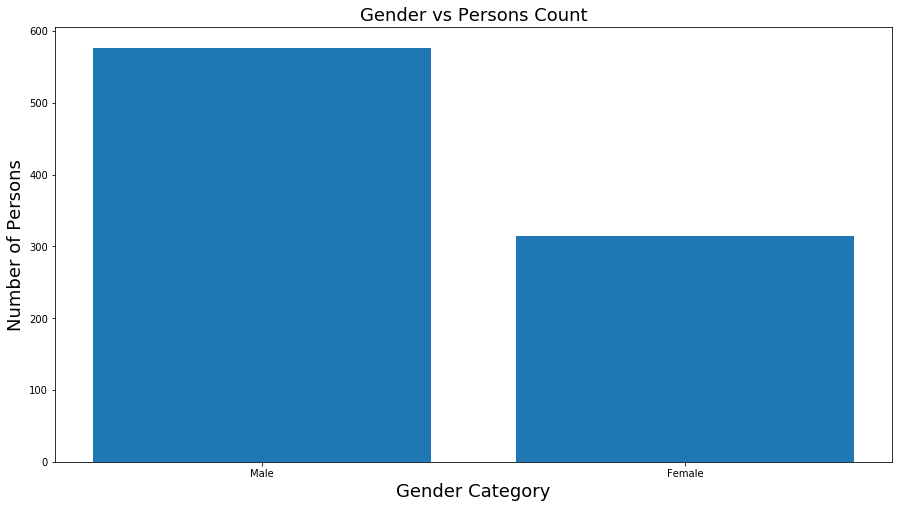

In [21]:
plt.figure(figsize=(15, 8))
plt.xlabel('Gender Category', fontdict=font)
plt.ylabel('Number of Persons', fontdict=font)
plt.bar(x=['Male', 'Female'], height=titanic_data['Sex'].value_counts())
plt.title('Gender vs Persons Count', fontdict=font)
plt.savefig('visualizations/Gender-Distribution')
plt.show()

## 4. Bivariate Analysis

### Continuous - Continuous variable analysis.

### Continuous - Categorical variable analysis.

### Categorical - Categorical variable analysis.

### 1. Continuous-Continuous variable analysis (Fare vs Age)

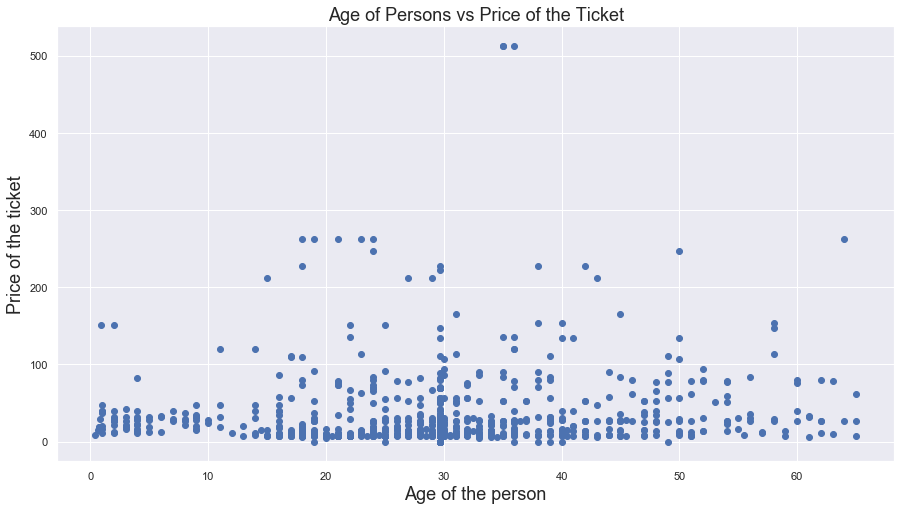

In [175]:
plt.figure(figsize=(15, 8))
plt.xlabel('Age of the person', fontdict=font)
plt.ylabel('Price of the ticket', fontdict=font)
plt.scatter(x=titanic_data['Age'], y=titanic_data['Fare'])
plt.title('Age of Persons vs Price of the Ticket', fontdict=font)
plt.savefig('visualizations/Fare-Age-Analysis')
plt.show()

### Print the correlation between 'Fare' and 'Age' column - 

In [23]:
titanic_data['Age'].corr(titanic_data['Fare'])

0.09606669176903894

### 2. Continuous - Categorical variable analysis (Age vs Sex)

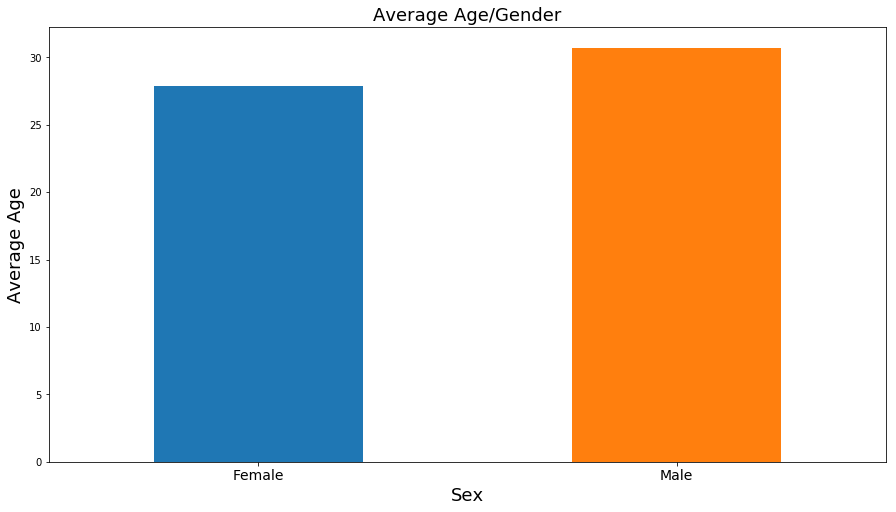

In [34]:
plt.figure(figsize=(15, 8))
plt.xlabel('Gender', fontdict=font)
plt.ylabel('Average Age', fontdict=font)
titanic_data.groupby('Sex')['Age'].mean().plot.bar()
plt.xticks(labels=['Female', 'Male'], ticks=[0, 1], rotation=0, fontsize=14)
plt.title('Average Age/Gender', fontdict=font)
plt.savefig('visualizations/Age-Gender-Analysis.png')
plt.show()

### 3. Categorical-Categorical Bivariate analysis (Sex vs Survived)

In [24]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


### Print the stacked column chart to describe the gender of the person who survived

In [56]:
male_data_unsurvived = titanic_data['Sex'][(titanic_data['Sex']=='male') & (titanic_data['Survived']==0)].shape[0]
male_data_unsurvived

468

In [57]:
male_data_survived = titanic_data['Sex'][(titanic_data['Sex']=='male') & (titanic_data['Survived']==1)].shape[0]
male_data_survived

109

In [58]:
female_data_unsurvived = titanic_data['Sex'][(titanic_data['Sex']=='female') & (titanic_data['Survived']==0)].shape[0]
female_data_unsurvived

81

In [59]:
female_data_survived = titanic_data['Sex'][(titanic_data['Sex']=='female') & (titanic_data['Survived']==1)].shape[0]
female_data_survived

233

In [44]:
gender_survived_data = pd.DataFrame()

In [60]:
gender_survived_data['Unsurvived'] = [male_data_unsurvived, female_data_unsurvived]

In [61]:
gender_survived_data

,Unsurvived,Survived
Male's Data,468,468
Female's Data,81,81


In [62]:
gender_survived_data['Survived'] = [male_data_survived, female_data_survived]

In [63]:
gender_survived_data

,Unsurvived,Survived
Male's Data,468,109
Female's Data,81,233


In [64]:
gender_survived_data.index = ["Male's Data", "Female's Data"]

In [68]:
gender_survived_data

,Unsurvived,Survived
Male's Data,468,109
Female's Data,81,233


In [71]:
import seaborn as sns

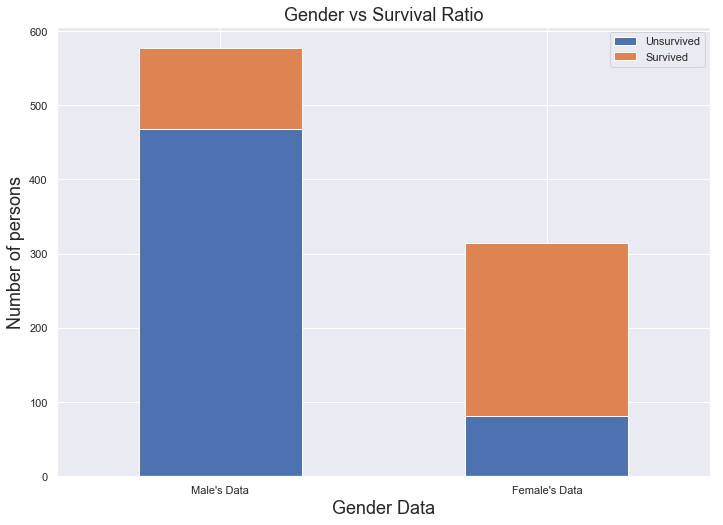

In [79]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
gender_survived_data.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.xlabel('Gender Data', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
plt.title('Gender vs Survival Ratio', fontdict=font)
plt.savefig('visualizations/Gender-vs-Survival.png')

### Perform the chi-square test

In [80]:
from scipy.stats import chi2_contingency

In [81]:
chi2_contingency(pd.crosstab(titanic_data['Sex'], titanic_data['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

### Multivariate Analysis

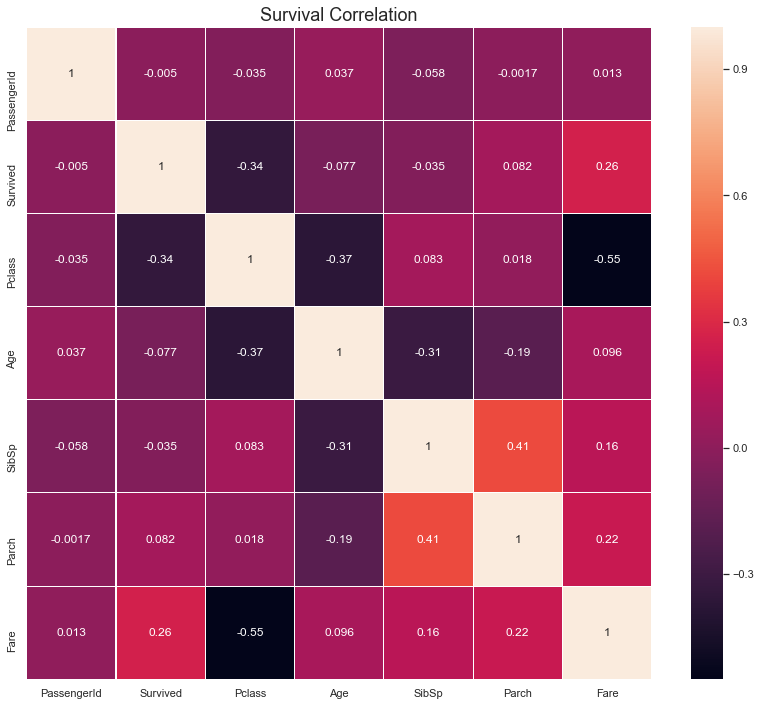

In [84]:
plt.figure(figsize=(14,12))
plt.title('Survival Correlation', fontdict=font)
sns.heatmap(titanic_data.corr(), linewidths=0.1, linecolor='white', annot=True)
plt.savefig('visualizations/Titanic-Columns-Correlation.png')

## 5. Outlier Detection and Treatment

### Detecting Missing values in our dataframe.

In [85]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Removing, Treating missing in Age variable.

In [86]:
# Remove
missing_values_removed = titanic_data.dropna()
missing_values_removed.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [87]:
# Filling up missing values
clean_data = titanic_data
clean_data.Age = clean_data.Age.fillna(titanic_data.Age.mean())
clean_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Checking outliers

### Treating outliers

In [88]:
# Detecting outlier values
outlier_values = titanic_data['Age'][titanic_data['Age']>65]
print(outlier_values)

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


In [89]:
titanic_data['Age'][titanic_data['Age']>65] = titanic_data.Age.mean()

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


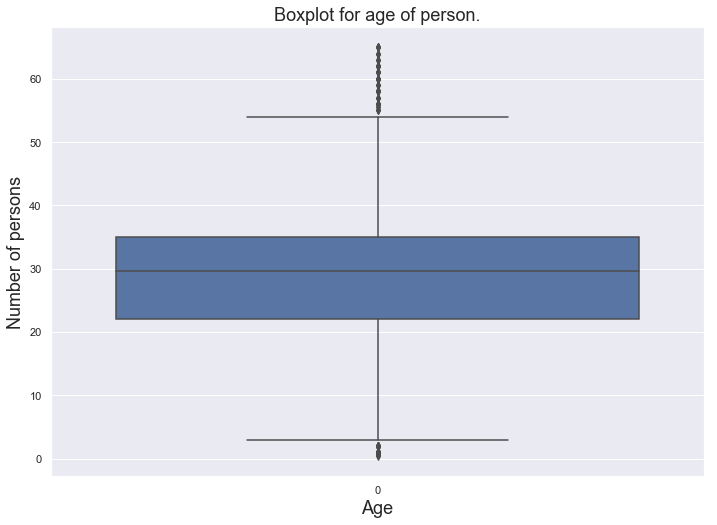

In [92]:
plt.xlabel('Age', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
plt.title('Boxplot for age of person.', fontdict=font)
sns.boxplot(data = titanic_data.Age)

## 6. Variable Transformation

### Check the distribution of age variable.

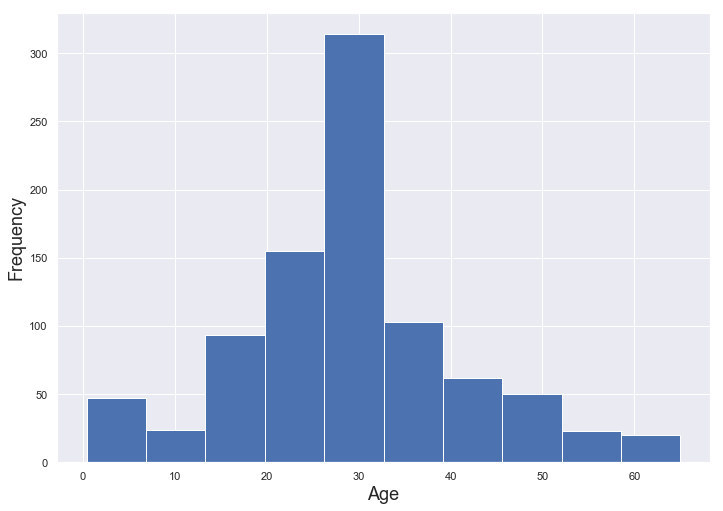

In [93]:
plt.xlabel('Age', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
titanic_data['Age'].plot.hist()
plt.show()

### Creating bins

In [94]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]
groups = ['Children', 'Teen', 'Adolescence', 'Adults', 'Married', 'Parents', 'Senior Citizens']
age_groups = pd.cut(titanic_data.Age, bins=bins, labels=groups)

In [96]:
age_groups.head()

0    Adolescence
1         Adults
2    Adolescence
3         Adults
4         Adults
Name: Age, dtype: category
Categories (7, object): [Children < Teen < Adolescence < Adults < Married < Parents < Senior Citizens]

In [97]:
age_groups.value_counts()

Adolescence        415
Adults             155
Teen               115
Married             86
Children            64
Parents             42
Senior Citizens     14
Name: Age, dtype: int64

### Creating Machine Learning model to check the prediction

### Logistic Regression

In [98]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [99]:
training_data = titanic_data[['PassengerId', 'Pclass', 'Age','Fare']]

In [105]:
training_data.head()

,PassengerId,Pclass,Age,Fare
0,1,3,22.0,7.2500
1,2,1,38.0,71.2833
2,3,3,26.0,7.9250
3,4,1,35.0,53.1000
4,5,3,35.0,8.0500


In [100]:
training_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
dtype: int64

In [101]:
output_data = titanic_data['Survived']

In [104]:
output_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [102]:
training_data.shape[0]

891

In [106]:
from sklearn.model_selection import train_test_split

In [108]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.4, random_state=42)

In [109]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

### Training your Machine Learning model

In [110]:
logistic_model.fit(X, Y)

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Checking the coefficients of each parameter.

In [153]:
logistic_model.coef_

array([[-9.64651072e-05, -7.29495012e-01, -2.88207353e-02,
         5.29858413e-03]])

In [162]:
details = pd.DataFrame(logistic_model.coef_.T, index=training_data.columns, columns=['Values'])

In [163]:
details

,Values
PassengerId,-0.000096
Pclass,-0.729495
Age,-0.028821
Fare,0.005299


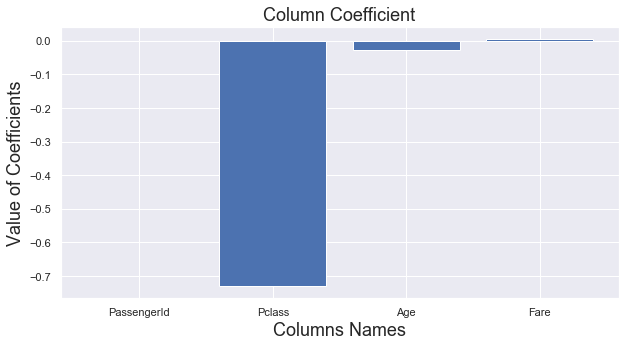

In [174]:
plt.figure(figsize=(10, 5))
plt.xlabel('Columns Names', fontdict=font)
plt.ylabel('Value of Coefficients', fontdict=font)
plt.title('Column Coefficient', fontdict=font)
plt.bar(x=details.index, height=details['Values'])
plt.savefig('visualizations/Column-vs-Coefficients.png')

### Making prediction about survival

In [117]:
single_prediction = logistic_model.predict([[892, 1.0, 20.0, 102.0]])

In [118]:
single_prediction

array([1], dtype=int64)

### Checking the prediction score of training data

In [123]:
training_prediction = logistic_model.predict(x_test)

In [125]:
training_prediction[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [128]:
training_accuracy = accuracy_score(training_prediction, y_test)

In [129]:
training_accuracy

0.7142857142857143

### Training Accuracy comes out to be 71.4%

### Make prediction on a already defined list

In [114]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [115]:
test_data = test_data[['PassengerId', 'Pclass', 'Age', 'Fare']]
test_data.head()

,PassengerId,Pclass,Age,Fare
0,892,3,34.5,7.8292
1,893,3,47.0,7.0000
2,894,2,62.0,9.6875
3,895,3,27.0,8.6625
4,896,3,22.0,12.2875


### Converting the data

In [136]:
from sklearn.preprocessing import Imputer

In [131]:
test_data_imputed = test_data

In [135]:
imputer = Imputer(strategy='most_frequent')

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [137]:
imputer.fit(test_data_imputed)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [139]:
imputer.statistics_

array([892.  ,   3.  ,  21.  ,   7.75])

In [140]:
test_data_predicion = imputer.transform(test_data_imputed)

In [141]:
test_data_predicion

array([[ 892.    ,    3.    ,   34.5   ,    7.8292],
       [ 893.    ,    3.    ,   47.    ,    7.    ],
       [ 894.    ,    2.    ,   62.    ,    9.6875],
       ...,
       [1307.    ,    3.    ,   38.5   ,    7.25  ],
       [1308.    ,    3.    ,   21.    ,    8.05  ],
       [1309.    ,    3.    ,   21.    ,   22.3583]])

In [142]:
test_data_imputed = pd.DataFrame(test_data_predicion, columns=test_data.columns)

In [143]:
test_data_imputed.head()

,PassengerId,Pclass,Age,Fare
0,892.0,3.0,34.5,7.8292
1,893.0,3.0,47.0,7.0000
2,894.0,2.0,62.0,9.6875
3,895.0,3.0,27.0,8.6625
4,896.0,3.0,22.0,12.2875


In [146]:
test_prediction = logistic_model.predict(test_data_imputed)

In [149]:
test_prediction[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Write the predictions made on a csv file, with Passenger ID and Survived

In [151]:
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_prediction})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [152]:
submission.to_csv('data/submission-logistic.csv')